<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_PC_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> B) AR + PC Regression <h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Mounted at /content/drive


In [ ]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [ ]:
data.shape

(754, 104)

In [ ]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [ ]:
data = data.drop([0])

In [ ]:
data_variables = data.drop(columns = ["sasdate"]).reset_index(drop=True)
data_variables.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,0.000007,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
1,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,0.000146,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
2,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,0.000434,0.000128,0.014949,0.019023,-0.06,-0.11,0.06,0.24,0.23,0.19,0.14,0.10,-0.06,0.43,1.06,1.45,1.41,1.47,2.06,0.000046,0.0,-0.000710,-0.000623,0.000009,0.000009,0.000042,0.000040,0.000000,0.000037,0.000005,0.000000,0.000022,0.000009,0.000007,0.000019,0.000012,0.000000,0.000000,3.123134e-07,2.765394e-06,1.141107e-06,0.000002,0.000021,0.000016,0.000000,0.000176
3,0.003102,0.002974,0.003708,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,-0.007044,0.023273,-0.006575,-0.007350,-0.003002,0.001142,0.005308,0.000000,-0.1473,0.001466,0.002316,-0.1,0.2,0.028659,-0.042689,-0.002075,0.062132,-0.048095,0.044765,0.002443,0.004325,0.007018,0.004202,0.004317,0.005335,0.002841,0.001374,0.001734,0.002834,0.002105,0.002857,-0.001227,40.2,0.0,40.6,7.315218,5.537334,5.837730,6.249975,5.961005,0.045693,0.007621,0.000013,0.000042,0.004066,0.000016,0.000029,-0.005743,0.000516,0.00009

In [ ]:
data.shape, CPI.shape

((753, 104), (753, 3))

In [ ]:
date = CPI["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
748,2021-07-01
749,2021-08-01
750,2021-09-01
751,2021-10-01


In [ ]:
CPI_diff_df = CPI.drop(columns = ["CPIAUCSL", "sasdate"])

In [ ]:
CPI_diff_df.head()

,CPIAUCSL_diff
0,-0.000691
1,0.001381
2,0.001721
3,0.000339
4,-0.001032


In [ ]:
CPI_data = pd.merge(CPI_diff_df, data_variables, left_index = True, right_index = True)
CPI_data

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.000691,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.000000,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000e+00,0.000046,2.214541e-05,0.000009,0.000027,0.000000e+00,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,2.173437e-05,0.000017,0.000094,0.000522
1,0.001381,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.000000,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,4.993606e-06,0.000011,0.000000e+00,0.000000,0.000000,1.882173e-05,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,2.153312e-05,0.000066,0.000023,0.000004
2,0.001721,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,4.337246e-04,0.000128,0.014949,0.019023,-0.06,-0.11,0.06,0.24,0.23,0.19,0.14,0.10,-0.06,0.43,1.06,1.45,1.41,1.47,2.06,0.000046,0.000000,-0.000710,-0.000623,0.000009,0.000009,0.000042,0.000040,0.000000,0.000037,4.971363e-06,0.000000,2.193844e-05,0.000009,0.000007,1.865947e-05,0.000012,0.000000,0.000000,3.123134e-07,2.765394e-06,1.141107e-06,0.000002,2.133466e-05,0.000016,0.000000,0.000176
3,0.000339,0.003102,0.002974,0.003708,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,-0.007044,0.023273,-0.006575,-0.007350,-0.003002,0.001142,0.005308,0.000000,-0.1473,0.001466,0.002316,-0.1,0.2,0.028659,-0.042689,-0.002075,0.062132,-0.048095,0.044765,0.002443,0.004325,0.007018,0.004202,0.004317,0.005335,0.002841,0.001374,0.001734,0.002834,0.002105,0.002857,-0.001227,40.2,0.0,40.6,7.315218

Let's check the variance distribution for each variable.

(array([3.30029875, 0.07174562, 0.17936406, 0.03587281, 0.        ,
        0.        , 0.03587281, 0.        , 0.        , 0.03587281,
        0.        , 0.        , 0.        , 0.03587281, 0.03587281]),
 array([3.56964391e-10, 2.68041003e-01, 5.36082005e-01, 8.04123008e-01,
        1.07216401e+00, 1.34020501e+00, 1.60824601e+00, 1.87628702e+00,
        2.14432802e+00, 2.41236902e+00, 2.68041002e+00, 2.94845103e+00,
        3.21649203e+00, 3.48453303e+00, 3.75257403e+00, 4.02061504e+00]),
 <a list of 15 Patch objects>)

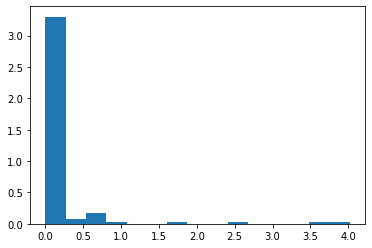

In [ ]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

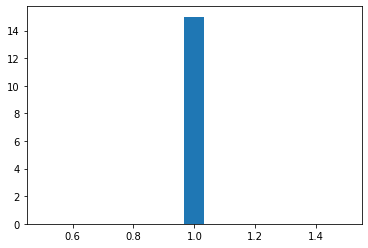

In [ ]:
CPI_data_st = StandardScaler().fit_transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [ ]:
CPI_data_df = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_df


,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.261529,0.312110,0.803350,0.795819,0.228191,1.210130,0.412662,0.265601,-0.145218,0.525993,-0.779380,0.430148,1.887337,1.933867,1.128868,1.164945,0.130201,1.120550,1.228248,1.614604,1.181953,-0.677139,-0.264007,-0.670702,-0.726541,-0.853746,-0.294690,-1.022079,-0.751020,0.789585,1.413821,0.003548,0.912492,1.578517,1.841802,0.712028,0.422389,0.744926,0.682954,1.135163,1.077979,0.182186,-0.442977,1.392428,-0.509105,0.544578,1.769129,1.139089,-0.639107,0.377948,0.455427,1.937625,-0.038066,-0.145444,0.621443,-0.141409,-0.083118,-0.005725,-0.185746,-0.180711,0.535144,0.513741,0.739854,0.248506,0.010353,0.182034,0.106848,0.121736,-0.036759,-0.179694,0.628439,0.841033,0.995964,0.352458,0.088226,-0.379016,-0.501056,0.173016,0.065802,0.102576,-0.409862,-0.441131,-0.352922,-0.339376,-0.330309,-0.196796,-0.343382,-0.326815,-0.150695,-0.134602,-0.248306,0.101499,-0.578458,-0.568133,-0.479522,-0.564115,-0.609173,-0.397242,-0.325584,-0.610056,0.021798,-0.265578,1.631675,1.840471
1,0.510751,0.317355,0.752749,-0.734327,-0.259412,1.877112,1.247416,1.153339,1.328667,0.125529,1.974089,1.293263,2.016167,1.450229,2.445681,1.647491,0.052140,-0.277187,1.796783,0.905837,0.981107,-0.904564,-0.506443,0.247445,-1.805214,-2.380661,-2.707726,-1.037030,-0.495301,0.724641,1.566060,0.096964,2.088155,1.374357,1.618179,0.570705,0.226562,0.313874,1.059758,-1.161266,0.885734,-0.024984,-0.135547,0.689210,-0.373835,0.483595,1.330499,1.007326,-0.426912,0.476741,0.178371,1.128928,-0.038150,-0.243564,-0.003199,-0.123899,-0.080452,0.027999,0.012978,0.444973,0.298761,0.346743,0.323449,0.368535,0.367014,0.279820,0.424231,0.488550,0.469854,0.057608,0.614122,0.814441,0.929822,0.329799,0.069403,-0.410547,-0.575913,0.081571,0.065802,0.109170,-0.504938,-0.441131,-0.352922,-0.339376,-0.320597,-0.199694,-0.398835,-0.260039,-0.217750,-0.827368,-0.343044,-0.257433,-0.069663,-0.234343,-0.479522,-0.564115,-0.441694,-0.415206,-0.326878,-0.120415,0.016012,0.214059,-0.006484,-0.558168
2,0.637677,0.257446,0.682365,1.100131,0.195424,1.273896,0.637199,0.696787,0.303771,0.549195,-0.164726,1.643371,1.870815,1.686400,0.624543,1.018181,0.355535,-0.980885,1.097811,-1.133016,-0.335154,-0.222290,-0.264007,-0.110102,0.831956,-1.163765,-0.472406,-1.283887,0.021732,0.479310,0.838088,0.383423,-0.054432,1.112241,1.192056,0.743625,0.287413,0.516247,0.837059,1.410951,0.695587,0.008910,0.018168,-0.014008,-0.103294,0.289139,1.195558,0.774829,-0.747055,0.531606,-1.160987,-0.709293,-0.037220,-0.004466,0.435843,-0.142584,-0.084742,-0.022562,0.420961,0.341106,0.252664,0.355104,-0.112785,-0.255615,0.163207,0.597625,0.741614,0.708639,0.654077,0.484752,0.542538,0.973992,1.326676,0.548838,0.226265,-0.305445,-0.496066,0.085338,0.065802,0.012503,-0.071818,-0.346009,-0.352922,-0.136152,-0.320597,-0.199694,-0.398835,-0.260337,-0.239802,-0.141076,-0.248306,-0.168401,-0.074050,-0.236637,-0.479522,-0.564115,-0.616693,-0.355231,-0.320401,-0.642659,0.010307,-0.268166,-0.542090,0.237093
3,0.122229,0.039392,0.089121,0.127246,0.275217,-0.085281,0.513046,0.470631,-0.594208,0.158522,-1.077136,1.148835,-0.697712,-0.541604,-0.384371,-0.07960

In [ ]:
CPI_data_df.shape

(753, 104)

In [ ]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for col in CPI_data_df.columns:
  for i in lags:
    CPI_data_df[col + "_lag_" + str(i)] = CPI_data_df[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [ ]:
CPI_data_df.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUEL

In [ ]:
CPI_data_df.shape

(753, 1352)

In [ ]:
CPI_data_df = CPI_data_df.dropna()
CPI_data_df.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
12      -0.511091 -0.058435 -0.246025         1.338814 -0.368108 -1.085716   
13       1.636798  0.065315  0.193351         1.492932  1.340792 -0.981835   
14      -1.266534 -0.018131  0.002729        -2.692968 -1.250538 -0.310321   
15       0.121407 -0.150242 -0.435611        -0.333351 -0.384707 -1.443471   
16      -1.264700 -0.064974 -0.085544        -0.069360 -0.937432 -0.540156   

     IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
12 -0.538628 -0.291251 -0.036784 -0.684932  1.020984 -0.063047 -1.498296   
13  0.035444 -0.079598  0.502501 -0.107258  1.156111 -0.803954 -2.066718   
14  0.378117  0.446611  0.391395  0.220323  0.272897 -0.000289 -0.904490   
15 -1.341900 -1.241112 -0.789523 -0.398201 -0.894599 -0.934711 -1.472083   
16 -0.773234 -0.718231 -1.010926 -1.264241  0.127525 -0.880702 -0.076205   

      IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
12 -1.873356 -0.093662  -1.248569   0.997029  0.422500 -1.610648 -2.952314   
13 -2.112151 -0.873854  -0.866170  -0.028343  1.366369 -1.154709  5.133913   
14 -0.879093  0.001027  -0.673260  -0.411659 -1.386941 -0.924790 -0.156124   
15 -1.896237 -0.056568  -1.176670   0.111760 -0.279122 -1.467451  1.047663   
16  0.170674 -0.834033  -0.379538   0.214491  1.107374 -0.579675 -1.244914   

      CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
12 -2.342914  1.369682 -0.142789  1.605263   0.907792  2.017969   2.377390   
13  2.758345 -0.449715 -0.506443  0.425983  -1.280296 -1.071730  -1.140929   
14  0.044998 -0.222290 -0.870097 -0.107517   0.787623 -1.833650  -1.356766   
15  0.073955  0.687408 -0.021571  0.119101   1.090002  1.053101   1.187103   
16 -0.760834  0.232559  0.826954 -0.181361   0.012950  1.153155   1.324212   

    UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
12  0.324572  1.201920 -0.405401 -1.826822      -0.123794 -5.524437 -0.557866   
13 -0.300898 -0.276112  0.855963  0.552572       0.305022  3.785249 -0.508248   
14 -1.414368  0.522576 -1.246304 -0.582113      -0.553612  0.411552 -0.780723   
15  0.222791  0.127230 -0.611592 -1.072879      -0.293438 -0.796737 -1.099304   
16  0.116907  0.340354 -0.354346 -0.572309      -1.530197 -0.021618 -0.516808   

     DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
12 -0.764428  0.047321  0.521507 -0.450142  0.143817 -0.329734  0.477036   
13 -0.797088  0.287728  1.042927  2.458241  0.807300  2.307515  0.473541   
14 -0.998558 -0.124376 -1.529658 -2.255680 -0.890848 -2.097417 -0.243400   
15 -1.261475 -0.537640 -0.257414 -0.399549 -0.691245 -0.252275  0.112414   
16 -0.589296 -0.263143 -0.159263 -0.316208 -0.406230 -0.136791  0.643746   

      USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
12  6.239169      -1.211553 -0.717227 -1.050186 -0.691806 -0.192772 -0.535195   
13 -0.073605      -0.750408 -2.826881 -1.050186 -0.201099  0.771688  0.271374   
14 -3.732726      -1.057838  2.095646 -0.914916 -0.246978  0.738350  0.353534   
15 -0.368800      -1.211553 -1.420445 -1.185456 -0.309173  0.658718  0.547444   
16 -0.037210      -1.057838 -0.014008 -1.185456 -0.442682  0.540182  0.417301   

      HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
12 -1.178302  0.033316 -0.369893 -2.559430 -0.038141 -0.246866  0.058714   
13 -0.894249 -0.066570 -0.361517 -2.187997 -0.038113 -0.257837 -0.794620   
14 -0.952074 -0.214747  0.204164 -1.468992 -0.038150 -0.258051 -0.185328   
15 -1.338110 -0.143998  0.376086 -0.847445 -0.038150 -0.176452  0.091804   
16 -1.454707 -0.223722 -0.952818 -1.816276 -0.037814 -0.099159  0.934761   

    BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
12 -0.141399 -0.083022   0.033567 -0.147470 -0.549661 -0.548081    -0.593330   
13 -0.137856 -0.084706   0.005758  0.021545 -0.609422  0.193248     0.178894   
14 -0.142584

In [ ]:
CPI_data_df.shape

(741, 1352)

In [ ]:
CPI_data_df = CPI_data_df.reset_index(drop = True)
CPI_data_df.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
0      -0.511091 -0.058435 -0.246025         1.338814 -0.368108 -1.085716   
1       1.636798  0.065315  0.193351         1.492932  1.340792 -0.981835   
2      -1.266534 -0.018131  0.002729        -2.692968 -1.250538 -0.310321   
3       0.121407 -0.150242 -0.435611        -0.333351 -0.384707 -1.443471   
4      -1.264700 -0.064974 -0.085544        -0.069360 -0.937432 -0.540156   

    IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
0 -0.538628 -0.291251 -0.036784 -0.684932  1.020984 -0.063047 -1.498296   
1  0.035444 -0.079598  0.502501 -0.107258  1.156111 -0.803954 -2.066718   
2  0.378117  0.446611  0.391395  0.220323  0.272897 -0.000289 -0.904490   
3 -1.341900 -1.241112 -0.789523 -0.398201 -0.894599 -0.934711 -1.472083   
4 -0.773234 -0.718231 -1.010926 -1.264241  0.127525 -0.880702 -0.076205   

     IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
0 -1.873356 -0.093662  -1.248569   0.997029  0.422500 -1.610648 -2.952314   
1 -2.112151 -0.873854  -0.866170  -0.028343  1.366369 -1.154709  5.133913   
2 -0.879093  0.001027  -0.673260  -0.411659 -1.386941 -0.924790 -0.156124   
3 -1.896237 -0.056568  -1.176670   0.111760 -0.279122 -1.467451  1.047663   
4  0.170674 -0.834033  -0.379538   0.214491  1.107374 -0.579675 -1.244914   

     CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
0 -2.342914  1.369682 -0.142789  1.605263   0.907792  2.017969   2.377390   
1  2.758345 -0.449715 -0.506443  0.425983  -1.280296 -1.071730  -1.140929   
2  0.044998 -0.222290 -0.870097 -0.107517   0.787623 -1.833650  -1.356766   
3  0.073955  0.687408 -0.021571  0.119101   1.090002  1.053101   1.187103   
4 -0.760834  0.232559  0.826954 -0.181361   0.012950  1.153155   1.324212   

   UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
0  0.324572  1.201920 -0.405401 -1.826822      -0.123794 -5.524437 -0.557866   
1 -0.300898 -0.276112  0.855963  0.552572       0.305022  3.785249 -0.508248   
2 -1.414368  0.522576 -1.246304 -0.582113      -0.553612  0.411552 -0.780723   
3  0.222791  0.127230 -0.611592 -1.072879      -0.293438 -0.796737 -1.099304   
4  0.116907  0.340354 -0.354346 -0.572309      -1.530197 -0.021618 -0.516808   

    DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
0 -0.764428  0.047321  0.521507 -0.450142  0.143817 -0.329734  0.477036   
1 -0.797088  0.287728  1.042927  2.458241  0.807300  2.307515  0.473541   
2 -0.998558 -0.124376 -1.529658 -2.255680 -0.890848 -2.097417 -0.243400   
3 -1.261475 -0.537640 -0.257414 -0.399549 -0.691245 -0.252275  0.112414   
4 -0.589296 -0.263143 -0.159263 -0.316208 -0.406230 -0.136791  0.643746   

     USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
0  6.239169      -1.211553 -0.717227 -1.050186 -0.691806 -0.192772 -0.535195   
1 -0.073605      -0.750408 -2.826881 -1.050186 -0.201099  0.771688  0.271374   
2 -3.732726      -1.057838  2.095646 -0.914916 -0.246978  0.738350  0.353534   
3 -0.368800      -1.211553 -1.420445 -1.185456 -0.309173  0.658718  0.547444   
4 -0.037210      -1.057838 -0.014008 -1.185456 -0.442682  0.540182  0.417301   

     HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
0 -1.178302  0.033316 -0.369893 -2.559430 -0.038141 -0.246866  0.058714   
1 -0.894249 -0.066570 -0.361517 -2.187997 -0.038113 -0.257837 -0.794620   
2 -0.952074 -0.214747  0.204164 -1.468992 -0.038150 -0.258051 -0.185328   
3 -1.338110 -0.143998  0.376086 -0.847445 -0.038150 -0.176452  0.091804   
4 -1.454707 -0.223722 -0.952818 -1.816276 -0.037814 -0.099159  0.934761   

   BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
0 -0.141399 -0.083022   0.033567 -0.147470 -0.549661 -0.548081    -0.593330   
1 -0.137856 -0.084706   0.005758  0.021545 -0.609422  0.193248     0.178894   
2 -0.142584 -0.084712   0.005692 -0.072896 -0.629233 -0.421682

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. Therefore, 492 PCA's are applied to the data and 492 models are run afterwards.
Principal Component Analysis is applied per shift and the selected components are those necessary to explain 60% of the variance in the data. Subsequently, the CPI is regressed in the PCA's chosen by the criterion. Remembering that the PCA's are applied to the original data and to the time lags from 1 to 12 periods, including the CPI time lags.
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the PC's importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the PC coefficient and the eigenvalue of the respective eigenvector that generated it.

In [ ]:
data = CPI_data_df.values
train, test = data[0:492], data[492:len(data)]
history = [x for x in train]
predictions = list()
importances = list()
for t in range(len(test)):
  history = history[-492:]
  y = [item[0] for item in history]
  X = [item[1:] for item in history]
  #PCA
  X_pca = PCA().fit_transform(X)
  pca_out = PCA().fit(X)
  var_ratio_cumsum = np.cumsum(pca_out.explained_variance_ratio_)
  limit_var = np.where(var_ratio_cumsum <= 0.60)
  n = np.array(limit_var)[0]
  pcs_number = np.where(n == n.max())[0][0]
  X_pca_new = pd.DataFrame(X_pca[:, 0:pcs_number])
  #LinearRegression
  model = LinearRegression()
  model.fit(X_pca_new, y)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  X_pred_feat_pca = pca_out.transform(X_pred_features)
  X_pred_pca_new = pd.DataFrame(X_pred_feat_pca[:, 0:pcs_number])
  yhat = model.predict(X_pred_pca_new)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #Variables Importances
  coefs = model.coef_.reshape(1, -1)[0]
  coefs_sub = np.absolute(coefs[0: pcs_number])
  eigen_values = pca_out.explained_variance_[0: pcs_number]
  importance = np.multiply(coefs_sub, eigen_values)
  importances.append(importance)
  print('predicted=%f, observed=%f, window=%f, pcs_number=%f' % (yhat, obs[0], (len(history)-1), pcs_number))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

predicted=0.033937, observed=-0.639641, window=492.000000, pcs_number=38.000000
predicted=-0.021737, observed=0.418362, window=492.000000, pcs_number=38.000000
predicted=-0.088976, observed=1.254507, window=492.000000, pcs_number=38.000000
predicted=0.286900, observed=-1.057329, window=492.000000, pcs_number=38.000000
predicted=0.156030, observed=-1.473761, window=492.000000, pcs_number=38.000000
predicted=-0.399686, observed=0.626508, window=492.000000, pcs_number=38.000000
predicted=-0.153562, observed=1.461401, window=492.000000, pcs_number=38.000000
predicted=-0.096720, observed=-2.519059, window=492.000000, pcs_number=38.000000
predicted=-0.030513, observed=0.835612, window=492.000000, pcs_number=38.000000
predicted=-0.030500, observed=-0.004117, window=492.000000, pcs_number=38.000000
predicted=-0.040714, observed=0.835612, window=492.000000, pcs_number=38.000000
predicted=0.135793, observed=-0.005059, window=492.000000, pcs_number=38.000000
predicted=0.198100, observed=0.411989,

In [ ]:
len(predictions), len(observed), len(test), len(data)

(249, 249, 249, 741)

In [ ]:
date = date[504: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-03-01
1,2001-04-01
2,2001-05-01
3,2001-06-01
4,2001-07-01


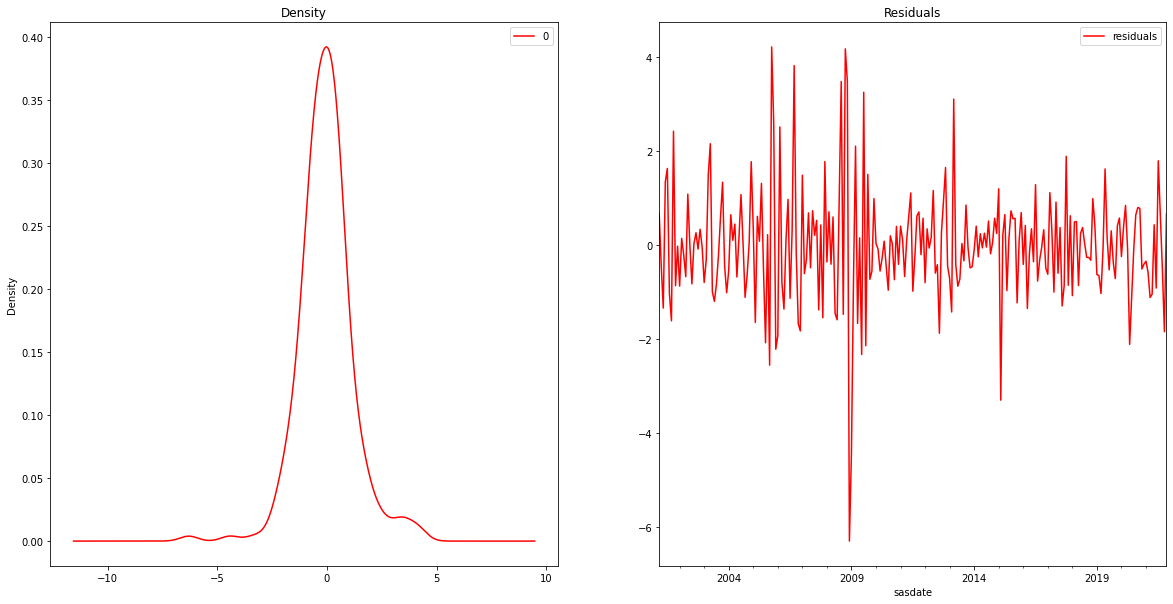

In [ ]:
pred_df = pd.DataFrame(predictions)
observed_df = pd.DataFrame(observed)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

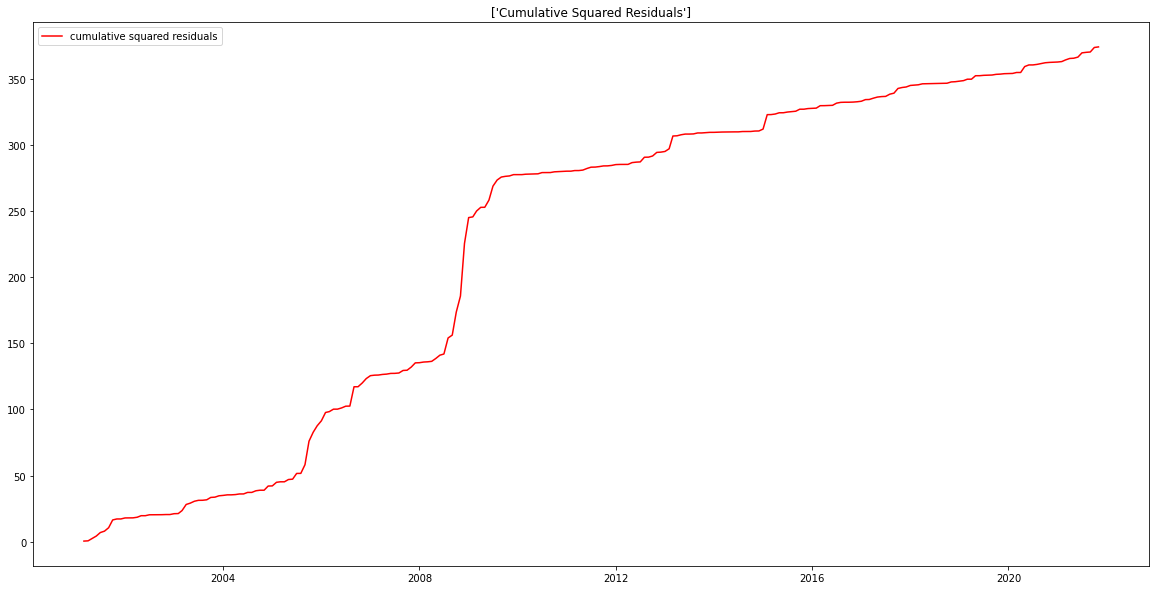

In [ ]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [ ]:
pred = pd.DataFrame(predictions)
observedd = pd.DataFrame(observed)

In [ ]:
pred.shape, observedd.shape, date.shape

((249, 1), (249, 1), (249, 1))

In [ ]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [ ]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])
df.head()

,0_x,0_y
sasdate,,
2001-03-01,0.033937,-0.639641
2001-04-01,-0.021737,0.418362
2001-05-01,-0.088976,1.254507
2001-06-01,0.286900,-1.057329
2001-07-01,0.156030,-1.473761


In [ ]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-03-01,0.033937,-0.639641
2001-04-01,-0.021737,0.418362
2001-05-01,-0.088976,1.254507
2001-06-01,0.286900,-1.057329
2001-07-01,0.156030,-1.473761


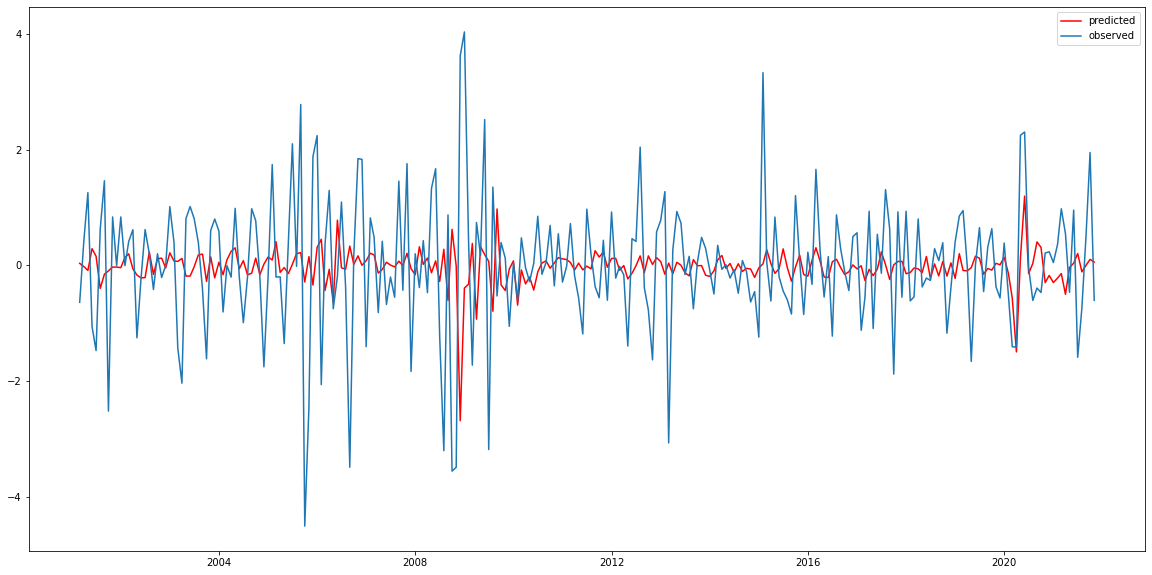

In [ ]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

This graph above shows the true values of the CPI variable and its prediction according to the estimated PCR Autoregressive Models. We can see a poor performance of the model, where it presented an MSE of 1.5, RMSE of 1.22 and a MAE of 0.8.

<h3> b) <h3>

The maximum number of PC's that were selected in each estimation was 41. Therefore, we used only 41 PC's for analysis.

In [ ]:
importances_df = pd.DataFrame(importances)
importances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.315676,0.118780,0.035059,0.449796,0.227919,0.111438,0.378888,0.012745,0.147536,0.081756,0.034915,0.023564,0.040372,0.110031,0.057457,0.155582,0.039527,0.153318,0.053857,0.066452,0.204225,0.180172,0.095549,0.029102,0.141139,0.230682,0.090763,0.114427,0.078327,0.469844,0.023925,0.055378,0.115747,0.088434,0.053532,0.020495,0.124851,0.021444,NaN,NaN,NaN
1,0.322278,0.120067,0.048464,0.467550,0.205215,0.105643,0.380366,0.009944,0.157540,0.068358,0.036626,0.032549,0.063111,0.076292,0.088146,0.107219,0.006209,0.126315,0.151168,0.067104,0.240804,0.029694,0.177194,0.004786,0.097245,0.266652,0.073556,0.036178,0.255468,0.278763,0.283188,0.103619,0.086640,0.169580,0.066467,0.037640,0.119956,0.106165,NaN,NaN,NaN
2,0.304250,0.116683,0.045557,0.465508,0.224803,0.107860,0.384578,0.020811,0.142244,0.124243,0.024398,0.049935,0.076012,0.063317,0.182357,0.016629,0.025780,0.045859,0.119331,0.058746,0.241973,0.176062,0.016551,0.052308,0.050006,0.283306,0.005083,0.065396,0.446189,0.108140,0.105630,0.096484,0.081817,0.170764,0.088324,0.119615,0.093741,0.097794,NaN,NaN,NaN
3,0.311670,0.106833,0.018525,0.441976,0.214458,0.110137,0.374487,0.058665,0.144415,0.113382,0.034405,0.042620,0.083827,0.055360,0.100401,0.054480,0.011438,0.001862,0.062182,0.050361,0.230020,0.227104,0.107462,0.109552,0.138697,0.175088,0.184296,0.011975,0.290857,0.362833,0.032119,0.046364,0.109311,0.151146,0.121413,0.088910,0.054492,0.094365,NaN,NaN,NaN
4,0.315923,0.115328,0.035191,0.438262,0.217372,0.110864,0.343679,0.147880,0.139574,0.116222,0.039040,0.043104,0.084288,0.048634,0.044347,0.076959,0.070218,0.016134,0.084996,0.043543,0.234336,0.244025,0.108527,0.084875,0.151347,0.206778,0.030946,0.195013,0.241470,0.375614,0.077811,0.029933,0.000408,0.171306,0.151813,0.089895,0.009604,0.038681,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.138442,0.192005,0.351997,0.274790,0.389744,0.526227,0.101357,0.550247,0.133851,0.508134,0.485334,0.376383,0.196135,0.151784,0.034639,0.128012,0.001367,0.089024,0.212898,0.235325,0.438375,0.346000,0.615895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,0.285422,0.030607,0.393165,0.282835,0.380584,0.641586,0.058433,0.506813,0.137736,0.505113,0.485283,0.358078,0.198509,0.161213,0.065471,0.051533,0.084325,0.185500,0.207063,0.165678,0.413304,0.418728,0.075489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,0.225392,0.115426,0.359845,0.280196,0.338088,0.643883,0.060678,0.522885,0.104056,0.507280,0.480835,0.358573,0.196577,0.153608,0.042148,0.061376,0.074243,0.189024,0.227581,0.141949,0.389130,0.392263,0.139231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,0.220033,0.126740,0.366252,0.261322,0.353516,0.634578,0.060478,0.533324,0.080206,0.496191,0.478672,0.358354,0.204870,0.157954,0.053865,0.085202,0.034485,0.210130,0.215092,0.332036,0.254157,0.394496,0.196354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
importances_df["sum"] = importances_df.sum(axis = 1)
importances_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,sum
0,0.315676,0.118780,0.035059,0.449796,0.227919,0.111438,0.378888,0.012745,0.147536,0.081756,0.034915,0.023564,0.040372,0.110031,0.057457,0.155582,0.039527,0.153318,0.053857,0.066452,0.204225,0.180172,0.095549,0.029102,0.141139,0.230682,0.090763,0.114427,0.078327,0.469844,0.023925,0.055378,0.115747,0.088434,0.053532,0.020495,0.124851,0.021444,NaN,NaN,NaN,4.752707
1,0.322278,0.120067,0.048464,0.467550,0.205215,0.105643,0.380366,0.009944,0.157540,0.068358,0.036626,0.032549,0.063111,0.076292,0.088146,0.107219,0.006209,0.126315,0.151168,0.067104,0.240804,0.029694,0.177194,0.004786,0.097245,0.266652,0.073556,0.036178,0.255468,0.278763,0.283188,0.103619,0.086640,0.169580,0.066467,0.037640,0.119956,0.106165,NaN,NaN,NaN,5.073762
2,0.304250,0.116683,0.045557,0.465508,0.224803,0.107860,0.384578,0.020811,0.142244,0.124243,0.024398,0.049935,0.076012,0.063317,0.182357,0.016629,0.025780,0.045859,0.119331,0.058746,0.241973,0.176062,0.016551,0.052308,0.050006,0.283306,0.005083,0.065396,0.446189,0.108140,0.105630,0.096484,0.081817,0.170764,0.088324,0.119615,0.093741,0.097794,NaN,NaN,NaN,4.898083
3,0.311670,0.106833,0.018525,0.441976,0.214458,0.110137,0.374487,0.058665,0.144415,0.113382,0.034405,0.042620,0.083827,0.055360,0.100401,0.054480,0.011438,0.001862,0.062182,0.050361,0.230020,0.227104,0.107462,0.109552,0.138697,0.175088,0.184296,0.011975,0.290857,0.362833,0.032119,0.046364,0.109311,0.151146,0.121413,0.088910,0.054492,0.094365,NaN,NaN,NaN,4.927487
4,0.315923,0.115328,0.035191,0.438262,0.217372,0.110864,0.343679,0.147880,0.139574,0.116222,0.039040,0.043104,0.084288,0.048634,0.044347,0.076959,0.070218,0.016134,0.084996,0.043543,0.234336,0.244025,0.108527,0.084875,0.151347,0.206778,0.030946,0.195013,0.241470,0.375614,0.077811,0.029933,0.000408,0.171306,0.151813,0.089895,0.009604,0.038681,NaN,NaN,NaN,4.973937


The importances are transformed to percentages.

In [ ]:
for col in importances_df.columns[:-1]:
  importances_df[col] = (importances_df[col].abs()*100)/importances_df["sum"]
importances_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,sum
0,6.642031,2.499209,0.737674,9.463990,4.795571,2.344735,7.972054,0.268166,3.104244,1.720193,0.734642,0.495797,0.849452,2.315124,1.208927,3.273547,0.831672,3.225905,1.133181,1.398195,4.297023,3.790945,2.010417,0.612321,2.969648,4.853703,1.909720,2.407617,1.648055,9.885813,0.503406,1.165187,2.435384,1.860712,1.126357,0.431238,2.626950,0.451198,NaN,NaN,NaN,4.752707
1,6.351853,2.366433,0.955194,9.215052,4.044637,2.082153,7.496731,0.195982,3.105000,1.347275,0.721872,0.641525,1.243871,1.503655,1.737298,2.113209,0.122381,2.489574,2.979402,1.322569,4.746060,0.585246,3.492364,0.094326,1.916625,5.255519,1.449731,0.713036,5.035087,5.494205,5.581425,2.042257,1.707616,3.342296,1.310011,0.741856,2.364242,2.092432,NaN,NaN,NaN,5.073762
2,6.211610,2.382218,0.930104,9.503881,4.589609,2.202083,7.851603,0.424874,2.904075,2.536566,0.498109,1.019481,1.551866,1.292684,3.723030,0.339494,0.526335,0.936271,2.436288,1.199377,4.940156,3.594499,0.337908,1.067930,1.020934,5.784018,0.103785,1.335140,9.109462,2.207796,2.156556,1.969823,1.670384,3.486339,1.803236,2.442068,1.913837,1.996569,NaN,NaN,NaN,4.898083
3,6.325127,2.168110,0.375954,8.969605,4.352284,2.235152,7.599950,1.190557,2.930803,2.301020,0.698224,0.864947,1.701216,1.123484,2.037575,1.105630,0.232122,0.037787,1.261942,1.022042,4.668102,4.608922,2.180864,2.223287,2.814768,3.553291,3.740170,0.243018,5.902751,7.363442,0.651833,0.940920,2.218395,3.067404,2.463984,1.804373,1.105873,1.915073,NaN,NaN,NaN,4.927487
4,6.351569,2.318647,0.707505,8.811174,4.370215,2.228902,6.909589,2.973100,2.806104,2.336614,0.784896,0.866600,1.694591,0.977774,0.891595,1.547249,1.411711,0.324361,1.708824,0.875413,4.711268,4.906071,2.181916,1.706402,3.042792,4.157239,0.622167,3.920704,4.854705,7.551636,1.564373,0.601794,0.008193,3.444064,3.052168,1.807317,0.193091,0.777666,NaN,NaN,NaN,4.973937


In [ ]:
test = importances_df.sum(axis = 1) - importances_df["sum"]
test

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
244    100.0
245    100.0
246    100.0
247    100.0
248    100.0
Length: 249, dtype: float64

The number of PC's varies according to the estimation, so it is natural that the last ones have Na's values. To fix this we change Na's to zero.

In [ ]:
importances_df = importances_df.fillna(0)
importances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,sum
0,6.642031,2.499209,0.737674,9.463990,4.795571,2.344735,7.972054,0.268166,3.104244,1.720193,0.734642,0.495797,0.849452,2.315124,1.208927,3.273547,0.831672,3.225905,1.133181,1.398195,4.297023,3.790945,2.010417,0.612321,2.969648,4.853703,1.909720,2.407617,1.648055,9.885813,0.503406,1.165187,2.435384,1.860712,1.126357,0.431238,2.626950,0.451198,0.0,0.0,0.0,4.752707
1,6.351853,2.366433,0.955194,9.215052,4.044637,2.082153,7.496731,0.195982,3.105000,1.347275,0.721872,0.641525,1.243871,1.503655,1.737298,2.113209,0.122381,2.489574,2.979402,1.322569,4.746060,0.585246,3.492364,0.094326,1.916625,5.255519,1.449731,0.713036,5.035087,5.494205,5.581425,2.042257,1.707616,3.342296,1.310011,0.741856,2.364242,2.092432,0.0,0.0,0.0,5.073762
2,6.211610,2.382218,0.930104,9.503881,4.589609,2.202083,7.851603,0.424874,2.904075,2.536566,0.498109,1.019481,1.551866,1.292684,3.723030,0.339494,0.526335,0.936271,2.436288,1.199377,4.940156,3.594499,0.337908,1.067930,1.020934,5.784018,0.103785,1.335140,9.109462,2.207796,2.156556,1.969823,1.670384,3.486339,1.803236,2.442068,1.913837,1.996569,0.0,0.0,0.0,4.898083
3,6.325127,2.168110,0.375954,8.969605,4.352284,2.235152,7.599950,1.190557,2.930803,2.301020,0.698224,0.864947,1.701216,1.123484,2.037575,1.105630,0.232122,0.037787,1.261942,1.022042,4.668102,4.608922,2.180864,2.223287,2.814768,3.553291,3.740170,0.243018,5.902751,7.363442,0.651833,0.940920,2.218395,3.067404,2.463984,1.804373,1.105873,1.915073,0.0,0.0,0.0,4.927487
4,6.351569,2.318647,0.707505,8.811174,4.370215,2.228902,6.909589,2.973100,2.806104,2.336614,0.784896,0.866600,1.694591,0.977774,0.891595,1.547249,1.411711,0.324361,1.708824,0.875413,4.711268,4.906071,2.181916,1.706402,3.042792,4.157239,0.622167,3.920704,4.854705,7.551636,1.564373,0.601794,0.008193,3.444064,3.052168,1.807317,0.193091,0.777666,0.0,0.0,0.0,4.973937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2.137125,2.963977,5.433757,4.241916,6.016465,8.123336,1.564643,8.494127,2.066244,7.844034,7.492070,5.810198,3.027733,2.343085,0.534725,1.976111,0.021106,1.374253,3.286490,3.632693,6.767178,5.341189,9.507546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.477964
245,4.684837,0.502378,6.453301,4.642369,6.246786,10.530804,0.959100,8.318675,2.260765,8.290772,7.965290,5.877386,3.258270,2.646110,1.074626,0.845841,1.384079,3.044749,3.398678,2.719387,6.783855,6.872885,1.239060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.092470
246,3.753870,1.922392,5.993152,4.666621,5.630787,10.723750,1.010584,8.708553,1.733041,8.448658,8.008215,5.971971,3.273957,2.558309,0.701971,1.022214,1.236507,3.148162,3.790315,2.364142,6.480897,6.533061,2.318870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.004268
247,3.602201,2.074886,5.995972,4.278143,5.787460,10.388774,0.990089,8.731125,1.313068,8.123222,7.836407,5.866662,3.353955,2.585896,0.881831,1.394859,0.564553,3.440071,3.521297,5.435805,4.160842,6.458349,3.214536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.108305


In [ ]:
importances_df = importances_df.drop(columns = ["sum"])

In [ ]:
importances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,6.642031,2.499209,0.737674,9.463990,4.795571,2.344735,7.972054,0.268166,3.104244,1.720193,0.734642,0.495797,0.849452,2.315124,1.208927,3.273547,0.831672,3.225905,1.133181,1.398195,4.297023,3.790945,2.010417,0.612321,2.969648,4.853703,1.909720,2.407617,1.648055,9.885813,0.503406,1.165187,2.435384,1.860712,1.126357,0.431238,2.626950,0.451198,0.0,0.0,0.0
1,6.351853,2.366433,0.955194,9.215052,4.044637,2.082153,7.496731,0.195982,3.105000,1.347275,0.721872,0.641525,1.243871,1.503655,1.737298,2.113209,0.122381,2.489574,2.979402,1.322569,4.746060,0.585246,3.492364,0.094326,1.916625,5.255519,1.449731,0.713036,5.035087,5.494205,5.581425,2.042257,1.707616,3.342296,1.310011,0.741856,2.364242,2.092432,0.0,0.0,0.0
2,6.211610,2.382218,0.930104,9.503881,4.589609,2.202083,7.851603,0.424874,2.904075,2.536566,0.498109,1.019481,1.551866,1.292684,3.723030,0.339494,0.526335,0.936271,2.436288,1.199377,4.940156,3.594499,0.337908,1.067930,1.020934,5.784018,0.103785,1.335140,9.109462,2.207796,2.156556,1.969823,1.670384,3.486339,1.803236,2.442068,1.913837,1.996569,0.0,0.0,0.0
3,6.325127,2.168110,0.375954,8.969605,4.352284,2.235152,7.599950,1.190557,2.930803,2.301020,0.698224,0.864947,1.701216,1.123484,2.037575,1.105630,0.232122,0.037787,1.261942,1.022042,4.668102,4.608922,2.180864,2.223287,2.814768,3.553291,3.740170,0.243018,5.902751,7.363442,0.651833,0.940920,2.218395,3.067404,2.463984,1.804373,1.105873,1.915073,0.0,0.0,0.0
4,6.351569,2.318647,0.707505,8.811174,4.370215,2.228902,6.909589,2.973100,2.806104,2.336614,0.784896,0.866600,1.694591,0.977774,0.891595,1.547249,1.411711,0.324361,1.708824,0.875413,4.711268,4.906071,2.181916,1.706402,3.042792,4.157239,0.622167,3.920704,4.854705,7.551636,1.564373,0.601794,0.008193,3.444064,3.052168,1.807317,0.193091,0.777666,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2.137125,2.963977,5.433757,4.241916,6.016465,8.123336,1.564643,8.494127,2.066244,7.844034,7.492070,5.810198,3.027733,2.343085,0.534725,1.976111,0.021106,1.374253,3.286490,3.632693,6.767178,5.341189,9.507546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
245,4.684837,0.502378,6.453301,4.642369,6.246786,10.530804,0.959100,8.318675,2.260765,8.290772,7.965290,5.877386,3.258270,2.646110,1.074626,0.845841,1.384079,3.044749,3.398678,2.719387,6.783855,6.872885,1.239060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
246,3.753870,1.922392,5.993152,4.666621,5.630787,10.723750,1.010584,8.708553,1.733041,8.448658,8.008215,5.971971,3.273957,2.558309,0.701971,1.022214,1.236507,3.148162,3.790315,2.364142,6.480897,6.533061,2.318870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
247,3.602201,2.074886,5.995972,4.278143,5.787460,10.388774,0.990089,8.731125,1.313068,8.123222,7.836407,5.866662,3.353955,2.585896,0.881831,1.394859,0.564553,3.440071,3.521297,5.435805,4.160842,6.458349,3.214536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


Text(0.5, 1.0, 'Percentage of the tree first PCs importances in each estimation (249).')

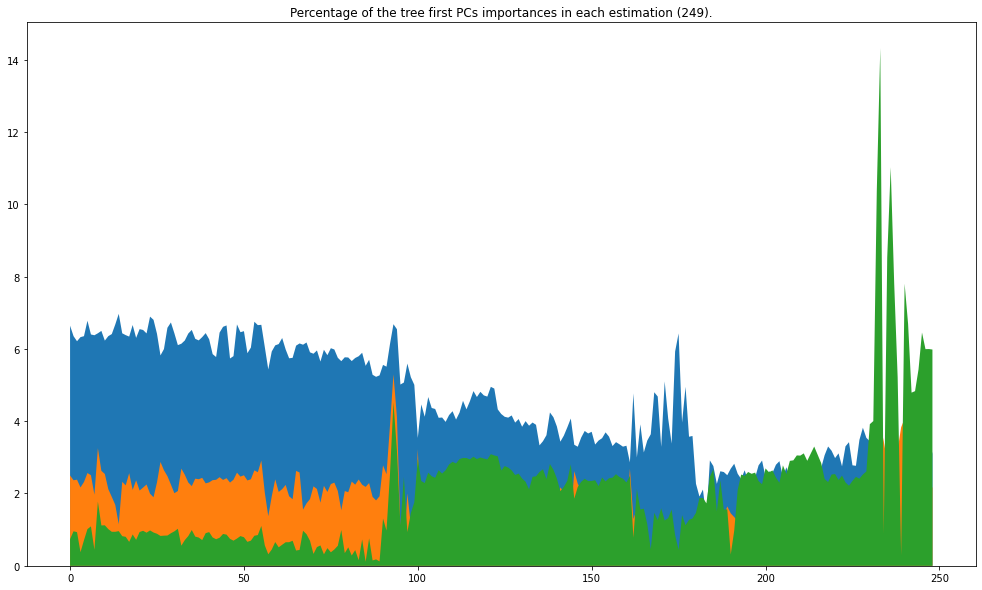

In [ ]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

for pca in importances_df.columns[0:3]:
  plt.stackplot(range(0, 249), importances_df[pca])

plt.title('Percentage of the tree first PCs importances in each estimation (249).')